# GOLEM Data Import from Numpy .npz files

In this Notebook, we import the loop voltage of a given GOLEM shot, with the data stored on the GOLEM website as Numpy .npz file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ShotNo = 26023
diagnSPEC = "loop_voltage"

In [3]:
# Forge the data URL
baseURL = "http://golem.fjfi.cvut.cz/utils/data/" 
dataURL = baseURL+ str(ShotNo) + '/' + diagnSPEC + '.npz'

In [4]:
# Retrieve data
print(f"Retrieve data from {dataURL}")
data_source = np.DataSource('.').open(dataURL) # also save the downloaded file into current dir
uloop = np.load(data_source.name, allow_pickle=True)

Retrieve data from http://golem.fjfi.cvut.cz/utils/data/26023/loop_voltage.npz


Loading a .npz file contains more than the raw data, but also additional information of the diagnostic

In [5]:
for key, value in uloop.items():
    print(f"data[{key}]={value}")

data[data]=[ 0.         0.         0.        ... -3.2897975 -3.3166485 -3.3166485]
data[scale]=1
data[info]=Loop voltage
data[ax_labels]=['Time [s]' 'Voltage [V]']
data[name]=loop_voltage
data[tvec_err]=None
data[data_err]=None
data[labels]=[None]
data[plasma_start]=nan
data[plasma_end]=nan
data[t_start]=0.0
data[t_end]=0.039999


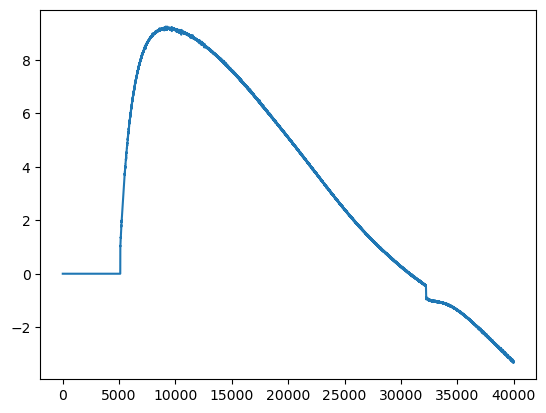

In [6]:
fig, ax = plt.subplots()
ax.plot(uloop['data'])

Text(0.5, 1.0, 'loop_voltage')

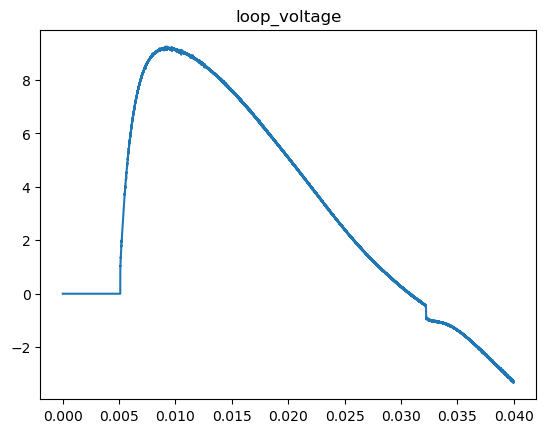

In [7]:
# the time array can be reconstructed from the diagnostic data:
t_uloop = np.linspace(uloop['t_start'], uloop['t_end'], len(uloop['data']))
fig, ax = plt.subplots()
ax.plot(t_uloop, uloop['data'])
ax.set_title(uloop['name'].astype(str)) # astype(str) to convert the byte mode